<a href="https://colab.research.google.com/github/sophia62/AI-Banking-Project/blob/main/Group_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score

In [ ]:
bank = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv")
bank.head(7)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
total_count_index = len(bank.index)
print(f"Total count using index: {total_count_index}")


Total count using index: 37069


In [ ]:
# mini holdout cheat sheet

# importing mini holdout
mini_holdout = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv')

# taking features we tested on, turning it into a var

holdout_x = mini_holdout[features]
# same for y
holdout_y = mini_holdout['poutcome']


# one-hot encoding cars so that the columns match
prediction_set = pd.get_dummies(holdout_x, drop_first=True)
real_test = pd.get_dummies(holdout_y, drop_first=True)


# testing the mini-holdout
clf.score(prediction_set, real_test)


NameError: name 'features' is not defined

In [ ]:
# scoring cheat sheet

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

expected_values = clf.predict(x_test)

precision = precision_score(y_test, expected_values)
recall = recall_score(y_test, expected_values)
f1 = f1_score(y_test, expected_values)

Jada's work:

In [ ]:
# Load data
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
df.head()

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df[["pdays", "previous", "poutcome"]]
# Proves that not everyone who has pdays=999 was never contacted before

,pdays,previous,poutcome
0,999,0,nonexistent
1,999,0,nonexistent
2,999,0,nonexistent
3,999,0,nonexistent
4,999,0,nonexistent
...,...,...,...
37064,999,0,nonexistent
37065,999,0,nonexistent
37066,999,0,nonexistent
37067,999,0,nonexistent


In [ ]:
df.info()
# Shows we're not missing any data in the traditional sense (no Null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

In [ ]:
# Encode our features and target as needed
#  'default',
features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

## <Dallin>

numeric_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for col in numeric_cols:
  df[col] = df[col].astype(float)
  min = df[col].min()
  max = df[col].max()
  df[col] = df[col].apply(lambda x: (x - min) / (max - min))

## <Dallin>

# pdays, campaign, poutcome, education (what a different group used)
X = pd.get_dummies(df[features], drop_first=True)
y = pd.get_dummies(df['y'], drop_first=True)

print(X.info())


# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Build the decision tree
# class_weight is a parameter of DecisionTreeClassifier that Bro Hayes says to probably use
clf = DecisionTreeClassifier(max_depth=5)

# Train it
clf.fit(X_train, y_train)

# Test it
clf.score(X_test, y_test)

# Note that this gives us an accuracy score, which may not be the best metric.
# See the SciKit-Learn docs for more ways to assess a model's performance, as
# well as methods for cross validation.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            37069 non-null  float64
 1   campaign                       37069 non-null  float64
 2   pdays                          37069 non-null  float64
 3   previous                       37069 non-null  float64
 4   emp.var.rate                   37069 non-null  float64
 5   cons.price.idx                 37069 non-null  float64
 6   cons.conf.idx                  37069 non-null  float64
 7   euribor3m                      37069 non-null  float64
 8   nr.employed                    37069 non-null  float64
 9   job_blue-collar                37069 non-null  bool   
 10  job_entrepreneur               37069 non-null  bool   
 11  job_housemaid                  37069 non-null  bool   
 12  job_management                 37069 non-null 

0.8959625932919701

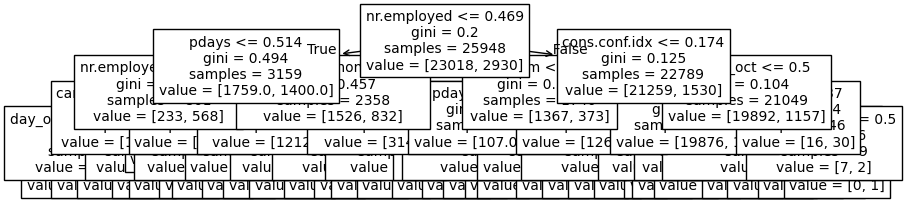

In [ ]:
# Let's visualize the tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 2))
tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.show()

In [ ]:
# mini holdout cheat sheet

# importing mini holdout
mini_holdout = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv')
mini_y_df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini_answers.csv')

# taking features we tested on, turning it into a var
holdout_x = pd.get_dummies(mini_holdout[features], drop_first=True)

# same for y
holdout_y = mini_y_df['y']

# one-hot encoding cars so that the columns match
prediction_set = pd.get_dummies(holdout_x, drop_first=True)
real_test = pd.get_dummies(holdout_y, drop_first=True)

# testing the mini-holdout
clf.score(prediction_set, real_test)


0.2658536585365854

In [ ]:
recall_score(y_test, clf.predict(X_test))

0.2699530516431925